<h2>В данной работе было осуществлено решение задачи анализа временных рядов, а также построение различных моделей прогнозирования данных. В данное работе используются методы: интегрированного скользящего среднего, экспоненциального сглаживания Холта Винтера, векторной авторегрессии. Данный код является альтернативой некоторой части функционала IBM SPSS Statistics.

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.vector_ar.var_model import VAR

data = {'Год':[1992, 1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011],
        'Урожайность (гг/га)':[19030.36, 17654.86, 14498.14, 13945.78, 15486.87, 18426.87, 13602.39, 15689.64, 16141.43, 20576.67,
                              20675.59, 17047.38, 19813.66, 19324.34, 19491.82, 21007.21, 24458.91, 23181.78, 19181.14, 22645.00]}
df = pd.DataFrame(data)   
print(df)

     Год  Урожайность (гг/га)
0   1992             19030.36
1   1993             17654.86
2   1994             14498.14
3   1995             13945.78
4   1996             15486.87
5   1997             18426.87
6   1998             13602.39
7   1999             15689.64
8   2000             16141.43
9   2001             20576.67
10  2002             20675.59
11  2003             17047.38
12  2004             19813.66
13  2005             19324.34
14  2006             19491.82
15  2007             21007.21
16  2008             24458.91
17  2009             23181.78
18  2010             19181.14
19  2011             22645.00


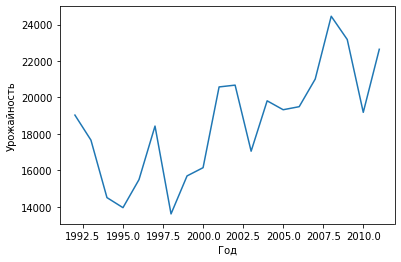

In [57]:
fig = plt.figure()
ax = fig.add_subplot()
x = df['Год']
y = df['Урожайность (гг/га)']
plt.plot(x,y)
ax.set_xlabel('Год')
ax.set_ylabel('Урожайность')
plt.show()

<h3>Авторегрессионное интегрированное скользящее среднее (ARIMA)

In [59]:
model = sm.tsa.ARIMA(df['Урожайность (гг/га)'], order = (2,1,0))
model_fit = model.fit(disp=0)
yhat = model_fit.predict(len(df))
forecast = model_fit.forecast(steps=5)[0]
print(forecast)

[23603.02019397 22314.30424432 22767.82229164 23581.46868911
 23568.36478658]


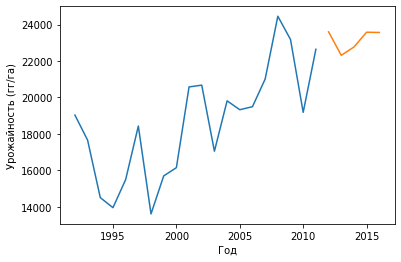

In [60]:
fig = plt.figure()
ax1 = fig.add_subplot()
x = df['Год']
y = df['Урожайность (гг/га)']
plt.plot(x, y)
data1 = {'Год':[2012, 2013, 2014, 2015, 2016]}
df1 = pd.DataFrame(data1)
x1 = df1['Год']
y1 = forecast
plt.plot(x1,y1)
ax1.set_xlabel('Год')
ax1.set_ylabel('Урожайность (гг/га)')
plt.show()

<h3>Экспоненциальное сглаживание Холта Винтера (HWES)

In [62]:
model1 = ExponentialSmoothing(df['Урожайность (гг/га)'])
model_fit1=model1.fit()
yhat1 = model_fit1.predict(len(df))
forecast1=model_fit1.forecast(steps = 5)
print(forecast1)

20    21759.877386
21    21759.877386
22    21759.877386
23    21759.877386
24    21759.877386
dtype: float64


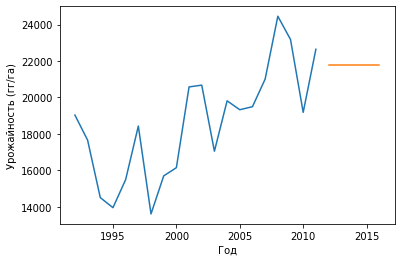

In [63]:
fig = plt.figure()
ax1 = fig.add_subplot()
x = df['Год']
y = df['Урожайность (гг/га)']
plt.plot(x, y)
x2 = df1['Год']
y2 = forecast1
plt.plot(x2,y2)
ax1.set_xlabel('Год')
ax1.set_ylabel('Урожайность (гг/га)')
plt.show()

<h3>Векторная авторегрессия (VAR) 

In [65]:
model2 = VAR(df)
model_fit2 = model2.fit()
forecast2 = model_fit2.forecast(model_fit2.y, steps = 5)
print(forecast2)

[[ 2012.         23080.61649013]
 [ 2013.         23532.85851783]
 [ 2014.         23987.42027627]
 [ 2015.         24442.30570248]
 [ 2016.         24897.23628945]]


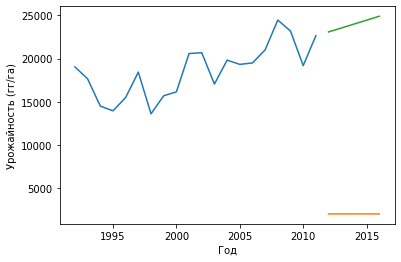

In [66]:
fig = plt.figure()
ax1 = fig.add_subplot()
x = df['Год']
y = df['Урожайность (гг/га)']
plt.plot(x,y)
x3 = df1['Год']
y3 = forecast2
plt.plot(x3,y3)
ax1.set_xlabel('Год')
ax1.set_ylabel('Урожайность (гг/га)')
plt.show()